In [61]:
import pandas as pd
import numpy as np
import joblib
import time
import random
modelo = joblib.load("modelo_zona_critica.pkl")
df = pd.read_csv("Datos/sensores.csv", parse_dates=["timestamp"])
df = df.dropna(subset=["temperatura", "humedad", "co2"])

class SensorAutoconfigurable:
    def __init__(self, sensor_id, modelo, data):
        self.id = sensor_id
        self.modelo = modelo
        self.data = data[data["sensor_id"] == sensor_id].reset_index(drop=True)
        self.frecuencia = 10
        self.protocolo = "WiFi"
        self.bateria = 100
        self.index = 0

    def leer_datos(self):
        if self.index >= len(self.data):
            return None  # sin más datos
        fila = self.data.iloc[self.index]
        self.index += 1
        return fila["temperatura"], fila["humedad"], fila["co2"], fila["timestamp"]

    def predecir(self, temp, hum, co2):
        entrada = pd.DataFrame([[temp, hum, co2]], columns=["temperatura", "humedad", "co2"])
        return self.modelo.predict(entrada)[0]

    def autoconfigurar(self, zona_critica):
        if zona_critica:
            self.frecuencia = 2
            self.protocolo = "LoRaWAN"
        elif self.bateria < 30:
            self.frecuencia = 30
            self.protocolo = "LoRa"
        else:
            self.frecuencia = 10
            self.protocolo = "WiFi"

    def operar(self, ciclos=10):
        for i in range(ciclos):
            lectura = self.leer_datos()
            if lectura is None:
                print("No hay más datos para este sensor.")
                break

            temp, hum, co2, timestamp = lectura
            zona_critica = self.predecir(temp, hum, co2)
            self.autoconfigurar(zona_critica)
            self.bateria -= np.random.uniform(0.5, 2.0)  # consumo simulado

            print(f"[{timestamp}] Sensor {self.id} | Temp: {temp:.2f} | Hum: {hum:.2f} | CO2: {co2:.2f} | "
                  f"{'CRITICAL' if zona_critica else 'Normal'} | Freq: {self.frecuencia}s | "
                  f"Protocol: {self.protocolo} | Battery: {self.bateria:.1f}%")

            time.sleep(0.2)

sensor = SensorAutoconfigurable(sensor_id=1, modelo=modelo, data=df)
sensor.operar(ciclos=20)

[2025-06-08 23:47:22.402159] Sensor 1 | Temp: 27.91 | Hum: 67.16 | CO2: 417.31 | Normal | Freq: 10s | Protocol: WiFi | Battery: 98.4%
[2025-06-08 23:48:17.402159] Sensor 1 | Temp: 28.75 | Hum: 65.37 | CO2: 409.52 | Normal | Freq: 10s | Protocol: WiFi | Battery: 97.2%
[2025-06-08 23:49:25.402159] Sensor 1 | Temp: 26.60 | Hum: 65.10 | CO2: 424.15 | Normal | Freq: 10s | Protocol: WiFi | Battery: 95.6%
[2025-06-08 23:50:17.402159] Sensor 1 | Temp: 27.39 | Hum: 69.96 | CO2: 399.13 | Normal | Freq: 10s | Protocol: WiFi | Battery: 94.8%
[2025-06-08 23:51:23.402159] Sensor 1 | Temp: 27.97 | Hum: 57.46 | CO2: 421.74 | Normal | Freq: 10s | Protocol: WiFi | Battery: 93.0%
[2025-06-08 23:52:22.402159] Sensor 1 | Temp: 30.23 | Hum: 64.47 | CO2: 408.50 | Normal | Freq: 10s | Protocol: WiFi | Battery: 92.1%
[2025-06-08 23:53:26.402159] Sensor 1 | Temp: 29.50 | Hum: 70.18 | CO2: 409.10 | Normal | Freq: 10s | Protocol: WiFi | Battery: 90.4%
[2025-06-08 23:54:22.402159] Sensor 1 | Temp: 27.91 | Hum: 67.

In [66]:
import pandas as pd
import numpy as np
import joblib
import time
import random
import os

modelo = joblib.load("modelo_zona_critica.pkl")
df = pd.read_csv("Datos/thermal_stress_simulation.csv", parse_dates=["timestamp"])
df = df.dropna(subset=["temperatura", "humedad", "co2"])

class SensorAutoconfigurable:
    def __init__(self, sensor_id, modelo, data):
        self.id = sensor_id
        self.modelo = modelo
        self.data = data[data["sensor_id"] == sensor_id].reset_index(drop=True)
        self.frecuencia = 10
        self.protocolo = "WiFi"
        self.bateria = 100
        self.index = 0

    def leer_datos(self):
        if self.index >= len(self.data):
            return None
        fila = self.data.iloc[self.index]
        self.index += 1
        return fila["temperatura"], fila["humedad"], fila["co2"], fila["timestamp"]

    def predecir(self, temp, hum, co2):
        entrada = pd.DataFrame([[temp, hum, co2]], columns=["temperatura", "humedad", "co2"])
        return self.modelo.predict(entrada)[0]

    def autoconfigurar(self, zona_critica):
        if zona_critica:
            self.frecuencia = 2
            self.protocolo = "LoRaWAN"
        elif self.bateria < 30:
            self.frecuencia = 30
            self.protocolo = "LoRa"
        else:
            self.frecuencia = 10
            self.protocolo = "WiFi"

    def operar(self, ciclos=20, guardar=True, ruta_salida="Datos/predicciones_estres_termico.csv"):
        resultados = []

        for i in range(ciclos):
            lectura = self.leer_datos()
            if lectura is None:
                print("No hay más datos para este sensor.")
                break

            temp, hum, co2, timestamp = lectura
            zona_critica = self.predecir(temp, hum, co2)
            self.autoconfigurar(zona_critica)

            # Simulación de consumo y control de batería
            self.bateria -= np.random.uniform(0.1, 0.3)  # Consumo más lento
            self.bateria = max(0, min(self.bateria, 100))

            print(f"[{timestamp}] Sensor {self.id} | Temp: {temp:.2f} | Hum: {hum:.2f} | CO2: {co2:.2f} | "
                  f"{'CRITICAL' if zona_critica else 'Normal'} | Freq: {self.frecuencia}s | "
                  f"Protocol: {self.protocolo} | Battery: {self.bateria:.1f}%")

            resultados.append({
                "timestamp": timestamp,
                "sensor_id": self.id,
                "temperatura": temp,
                "humedad": hum,
                "co2": co2,
                "prediccion": zona_critica,
                "frecuencia": self.frecuencia,
                "protocolo": self.protocolo,
                "bateria": round(self.bateria, 1)
            })

            time.sleep(0.2)

        if guardar and resultados:
            df_resultados = pd.DataFrame(resultados)
            os.makedirs(os.path.dirname(ruta_salida), exist_ok=True)
            df_resultados.to_csv(ruta_salida, index=False)
            print(f"\nPredicciones guardadas en: {ruta_salida}")
sensor = SensorAutoconfigurable(sensor_id=5, modelo=modelo, data=df)
sensor.operar(ciclos=110)

[2025-06-08 23:47:57.350887] Sensor 5 | Temp: 28.50 | Hum: 65.92 | CO2: 426.63 | Normal | Freq: 10s | Protocol: WiFi | Battery: 99.7%
[2025-06-08 23:48:58.350887] Sensor 5 | Temp: 27.88 | Hum: 59.86 | CO2: 431.73 | Normal | Freq: 10s | Protocol: WiFi | Battery: 99.6%
[2025-06-08 23:50:02.350887] Sensor 5 | Temp: 28.68 | Hum: 60.95 | CO2: 421.81 | Normal | Freq: 10s | Protocol: WiFi | Battery: 99.4%
[2025-06-08 23:51:03.350887] Sensor 5 | Temp: 29.58 | Hum: 67.21 | CO2: 407.03 | Normal | Freq: 10s | Protocol: WiFi | Battery: 99.2%
[2025-06-08 23:52:04.350887] Sensor 5 | Temp: 27.84 | Hum: 65.49 | CO2: 424.00 | Normal | Freq: 10s | Protocol: WiFi | Battery: 99.0%
[2025-06-08 23:53:03.350887] Sensor 5 | Temp: 27.85 | Hum: 64.42 | CO2: 413.49 | Normal | Freq: 10s | Protocol: WiFi | Battery: 98.9%
[2025-06-08 23:54:03.350887] Sensor 5 | Temp: 29.68 | Hum: 65.03 | CO2: 414.71 | Normal | Freq: 10s | Protocol: WiFi | Battery: 98.8%
[2025-06-08 23:54:59.350887] Sensor 5 | Temp: 28.89 | Hum: 66.

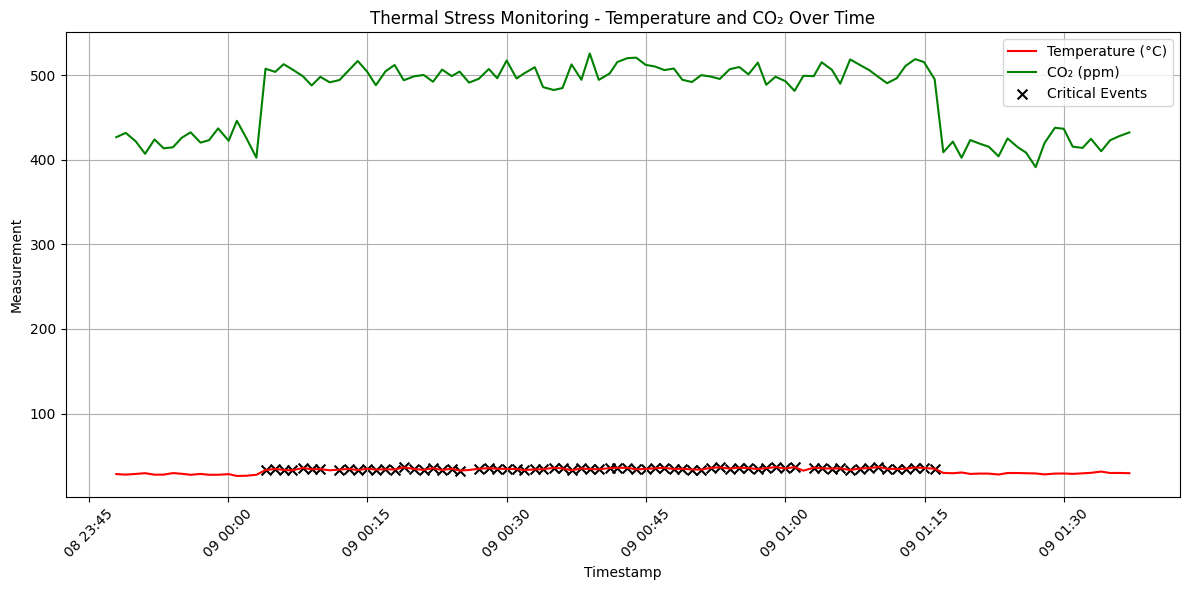

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("Datos/predicciones_estres_termico.csv", parse_dates=["timestamp"])
plt.figure(figsize=(12, 6))
plt.plot(df["timestamp"], df["temperatura"], label="Temperature (°C)", color="red", linewidth=1.5)
plt.plot(df["timestamp"], df["co2"], label="CO₂ (ppm)", color="green", linewidth=1.5)
criticos = df[df["prediccion"] == 1]
plt.scatter(criticos["timestamp"], criticos["temperatura"], label="Critical Events", color="black", marker='x', s=50)
plt.title("Thermal Stress Monitoring - Temperature and CO₂ Over Time")
plt.xlabel("Timestamp")
plt.ylabel("Measurement")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.savefig("stress_graph_annotated.png", dpi=300)
plt.show()